In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("Cancer_Dataset.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.dtypes


Pregnancies         int64
Glucose             int64
BloodPressure       int64
SkinThickness       int64
Insulin             int64
BMI               float64
Cancer_Markers    float64
Age                 int64
Outcome             int64
dtype: object

In [6]:
print(data.shape)
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    data.drop_duplicates(inplace=True)
print(data.shape)

(768, 9)
(768, 9)


In [7]:
print(data.isnull().sum())
#No null values found

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI               0
Cancer_Markers    0
Age               0
Outcome           0
dtype: int64


In [8]:
# Checking for any columns have value as 0. since many rows have value 0, we can't remove all such rows. 
# In addition we can replace 0 with mean or median but the data looks too sensitive so not replacing as well.
columns_list = ["Glucose", "BloodPressure", "Insulin", "BMI"]
for column in columns_list:
    index_list = data[data[column] == 0].index.values
    if len(index_list) != 0:
        print("Column name {} and zero_rows_count {}".format(column, len(index_list)))
#         data.drop(index=index_list, inplace=True)
# print(data.shape)

Column name Glucose and zero_rows_count 5
Column name BloodPressure and zero_rows_count 35
Column name Insulin and zero_rows_count 374
Column name BMI and zero_rows_count 11


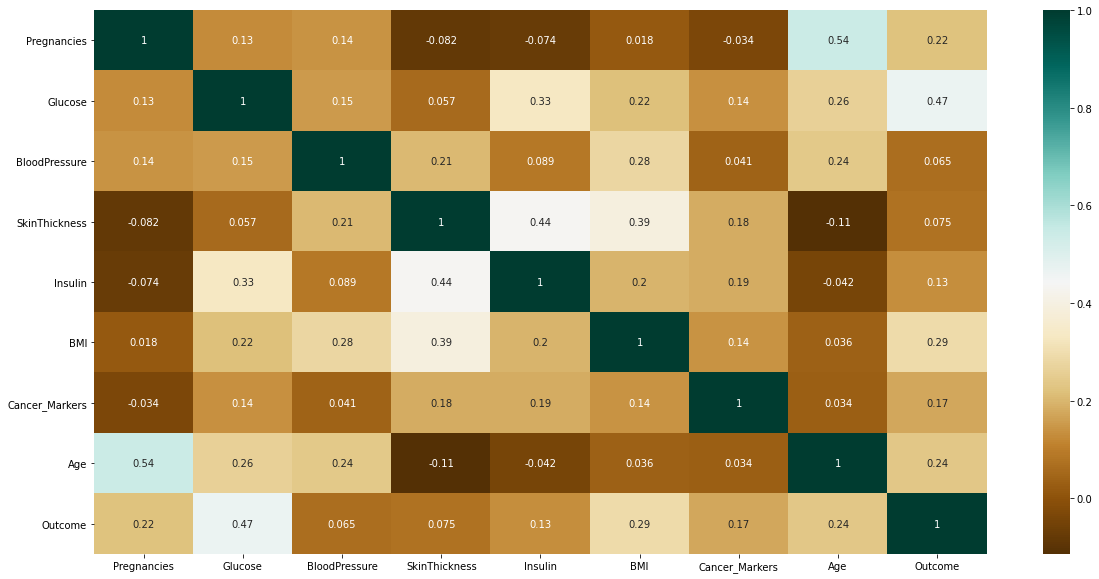

In [9]:
plt.figure(figsize=(20,10))
h = data.corr()
sns.heatmap(h,cmap="BrBG", annot=True)
# Looks only few attributes are contributing to the outcome as per heat map

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


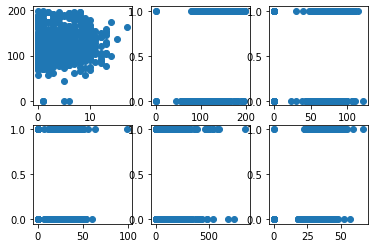

In [11]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(data['Pregnancies'], data['Glucose'])
axs[0, 1].scatter(data['Glucose'], data['Outcome'])
axs[0, 2].scatter(data['BloodPressure'], data['Outcome'])
axs[1, 0].scatter(data['SkinThickness'], data['Outcome'])
axs[1, 1].scatter(data['Insulin'], data['Outcome'])
axs[1, 2].scatter(data['BMI'], data['Outcome'])

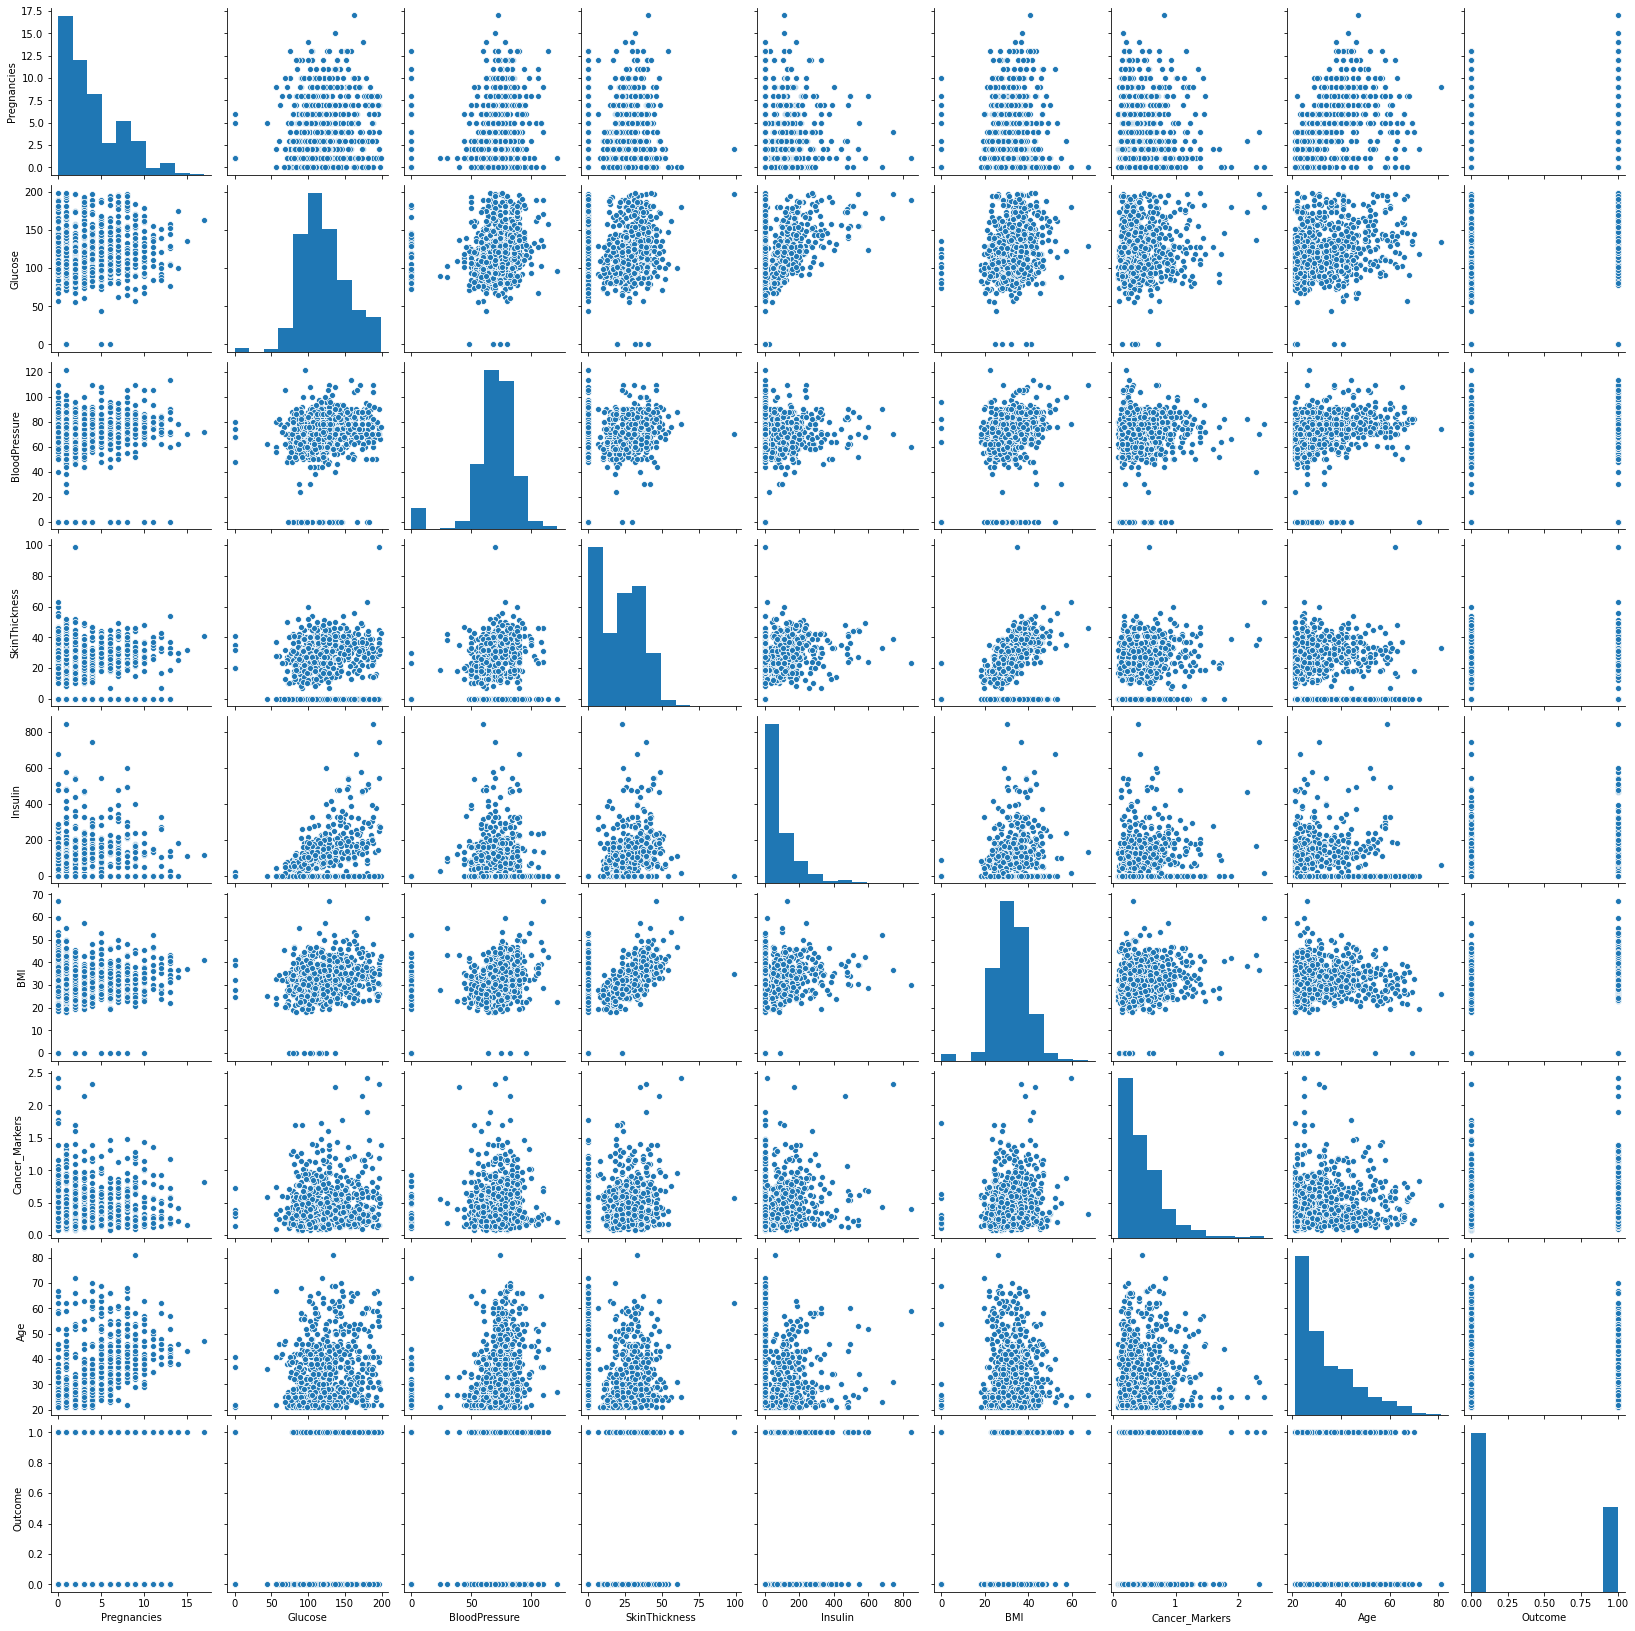

In [12]:
sns.pairplot(data)

In [13]:
X= np.array(data.drop(['Outcome'], 1))
y = np.array(data['Outcome'])
x_min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.00001,1))
x_scaled = x_min_max_scaler.fit_transform(X)

In [14]:
X_train, X_rem , y_train, y_rem = sklearn.model_selection.train_test_split(x_scaled, y, test_size=0.2)
X_cv, X_test , y_cv, y_test = sklearn.model_selection.train_test_split(X_rem, y_rem, test_size=0.5)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
cv_accuracy = np.empty(len(neighbors))


for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    
    cv_accuracy[i] = knn.score(X_cv, y_cv)


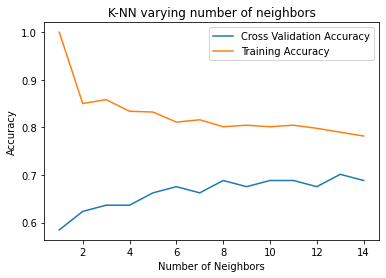

In [16]:
plt.title('K-NN varying number of neighbors')
plt.plot(neighbors, cv_accuracy, label='Cross Validation Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [21]:
# We are randomly selecting data for Training so each time we have choose the right value of k.
# For above prediction we can choose k value as 2 as per elbow method. or we can go with the k value as 13 which 
# gives minimum distance between Training score vs Cross Validation score
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.7272727272727273

In [18]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
# First row First column is True -ve
# First row second column is False +ve
# Second row First column is False -ve
# Second row second column is True +ve

Predicted,0,1,All
True,,,
0,35,5,40
1,17,20,37
All,52,25,77


In [19]:
# With the help of above values we can calculate Precision and Recall and then find F1-score with Precision and recall.
# We need high score for Precision as well as Recall to avoid skewed class issue
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        40
           1       0.80      0.54      0.65        37

    accuracy                           0.71        77
   macro avg       0.74      0.71      0.70        77
weighted avg       0.73      0.71      0.71        77

